In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
plt.style.use("default")


## Loading the Datasets

In [3]:
# Load sentiment data
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

# Load trader data
trades_df = pd.read_csv("/content/historical_data.csv")


## Initial Exploration

In [4]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

## Data Cleaning

In [11]:
# Convert Date to datetime
sentiment_df["Date"] = pd.to_datetime(sentiment_df["date"])

# Normalize sentiment labels
sentiment_df["Classification"] = sentiment_df["classification"].str.strip().str.capitalize()

# Keep only Fear & Greed
sentiment_df = sentiment_df[sentiment_df["Classification"].isin(["Fear", "Greed"])]

sentiment_df.head()


,timestamp,value,classification,date,Date,Classification
0,1517463000,30,Fear,2018-02-01,2018-02-01,Fear
2,1517635800,40,Fear,2018-02-03,2018-02-03,Fear
6,1517981400,36,Fear,2018-02-07,2018-02-07,Fear
7,1518067800,30,Fear,2018-02-08,2018-02-08,Fear
8,1518154200,44,Fear,2018-02-09,2018-02-09,Fear


In [18]:
# Convert UNIX timestamp (milliseconds) to datetime
trades_df["time"] = pd.to_datetime(trades_df["Timestamp"], unit="ms", errors="coerce")


trades_df = trades_df.rename(columns={
    "Account": "account",
    "Coin": "symbol",
    "Execution Price": "execution_price",
    "Size Tokens": "size_tokens",
    "Size USD": "size_usd",
    "Side": "side",
    "Closed PnL": "closedPnL"
})



In [20]:
trades_df = trades_df.dropna(subset=["closedPnL"])
numeric_cols = [
    "execution_price",
    "size_tokens",
    "size_usd",
    "closedPnL",
    "Fee"
]

for col in numeric_cols:
    trades_df[col] = pd.to_numeric(trades_df[col], errors="coerce")


In [21]:
trades_df = trades_df.dropna(subset=numeric_cols)


In [22]:
trades_df["Date"] = trades_df["time"].dt.date
trades_df["Date"] = pd.to_datetime(trades_df["Date"])


In [24]:
trades_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   symbol            211224 non-null  object        
 2   execution_price   211224 non-null  float64       
 3   size_tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   closedPnL         211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [25]:
trades_df.head()

,account,symbol,execution_price,size_tokens,size_usd,side,Timestamp IST,Start Position,Direction,closedPnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


## Feature Engineering

In [26]:
trades_df["Date"] = trades_df["time"].dt.date
trades_df["Date"] = pd.to_datetime(trades_df["Date"])


In [27]:
trades_df["direction"] = trades_df["side"].map({
    "BUY": 1,
    "SELL": -1
})


In [28]:
trades_df["is_profitable"] = trades_df["closedPnL"] > 0


## Merge Sentiment with Trader Data

In [29]:
merged_df = trades_df.merge(
    sentiment_df,
    on="Date",
    how="inner"
)

merged_df.head()


,account,symbol,execution_price,size_tokens,size_usd,side,Timestamp IST,Start Position,Direction,closedPnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,Date,direction,is_profitable,timestamp,value,classification,date,Classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1,False,1730007000,74,Greed,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1,False,1730007000,74,Greed,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1,False,1730007000,74,Greed,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1,False,1730007000,74,Greed,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1,False,1730007000,74,Greed,2024-10-27,Greed


In [66]:
# Save merged dataset
merged_df.to_csv("merged_trader_sentiment_data.csv", index=False)


In [67]:
from google.colab import files
files.download("merged_trader_sentiment_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Core Analysis

In [30]:
profit_by_sentiment = merged_df.groupby("Classification")["closedPnL"].agg(
    total_pnl="sum",
    avg_pnl="mean",
    median_pnl="median",
    trade_count="count"
)

profit_by_sentiment


,total_pnl,avg_pnl,median_pnl,trade_count
Classification,,,,
Fear,6.699925e+06,50.047622,0.0,133871
Greed,3.189617e+06,87.894859,0.0,36289


In [31]:
#Win Rate by Sentiment
win_rate = merged_df.groupby("Classification")["is_profitable"].mean() * 100
win_rate


,is_profitable
Classification,
Fear,41.514592
Greed,44.647138


In [34]:
# Createing implied leverage
# Avoid division by zero
merged_df = merged_df[merged_df["Start Position"] != 0]

merged_df["implied_leverage"] = merged_df["size_usd"] / merged_df["Start Position"].abs()


/tmp/ipython-input-1196223347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["implied_leverage"] = merged_df["size_usd"] / merged_df["Start Position"].abs()


In [38]:
#Analyzing it
implied_leverage_stats = merged_df.groupby("Classification")["implied_leverage"].agg(
    avg_leverage="mean",
    max_leverage="max"
)

implied_leverage_stats


,avg_leverage,max_leverage
Classification,,
Fear,1.132250e+06,7.696000e+10
Greed,3.629589e+04,1.723815e+08


In [39]:
# T-test on exposure
fear_df = merged_df[merged_df["Classification"] == "Fear"]
greed_df = merged_df[merged_df["Classification"] == "Greed"]

from scipy.stats import ttest_ind

t_stat_exp, p_val_exp = ttest_ind(
    fear_df["size_usd"],
    greed_df["size_usd"],
    equal_var=False
)

t_stat_exp, p_val_exp


(np.float64(20.272918544633082), np.float64(2.965228489815177e-91))

In [44]:
#Trader Consistency (Fear vs Greed)
account_sentiment_pnl = merged_df.groupby(
    ["account", "Classification"]
)["closedPnL"].sum().unstack(fill_value=0)

account_sentiment_pnl.head()


Classification,Fear,Greed
account,,
0x083384f897ee0f19899168e3b1bec365f52a9012,1.927736e+06,-327505.900056
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1.709873e+04,20607.446093
0x271b280974205ca63b716753467d5a371de622ab,2.997093e+04,1793.160215
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.043510e+04,121880.386016
0x2c229d22b100a7beb69122eed721cee9b24011dd,1.164123e+05,52215.729448


# Hidden Pattern Discovery

In [46]:
# Remove rows with zero or missing start position
merged_df = merged_df[
    (merged_df["Start Position"].notna()) &
    (merged_df["Start Position"] != 0)
].copy()

# Create implied leverage
merged_df["implied_leverage"] = (
    merged_df["size_usd"] / merged_df["Start Position"].abs()
)


In [54]:
print("Whether traders are taking more leveraged exposure during Greed vs Fear.")
implied_lev_stats = merged_df.groupby("Classification")["implied_leverage"].agg(
    avg_implied_leverage="mean",
    median_implied_leverage="median",
    max_implied_leverage="max"
)

implied_lev_stats


Whether traders are taking more leveraged exposure during Greed vs Fear.


,avg_implied_leverage,median_implied_leverage,max_implied_leverage
Classification,,,
Fear,1.132250e+06,0.177422,7.696000e+10
Greed,3.629589e+04,0.122044,1.723815e+08


Identify the top 25% leveraged trades during Greed.


In [49]:

# High implied leverage threshold
lev_threshold = merged_df["implied_leverage"].quantile(0.75)

high_lev_greed = merged_df[
    (merged_df["Classification"] == "Greed") &
    (merged_df["implied_leverage"] >= lev_threshold)
]

high_lev_greed["closedPnL"].describe()


,closedPnL
count,8364.000000
mean,36.546614
std,1566.499781
min,-117990.104100
25%,0.000000
50%,0.000000
75%,4.823904
max,32004.883600


Fear Market Survivors (Low Leverage Discipline)

In [55]:
fear_profitable = merged_df[
    (merged_df["Classification"] == "Fear") &
    (merged_df["closedPnL"] > 0)
]

fear_profitable["implied_leverage"].describe()


,implied_leverage
count,5.557600e+04
mean,1.643916e+03
std,3.999228e+04
min,9.570242e-09
25%,1.433180e-02
50%,1.567920e-01
75%,1.655357e+00
max,8.551863e+06


Statistical Test: Implied Leverage (Fear vs Greed)

In [56]:
from scipy.stats import ttest_ind

fear_df = merged_df[merged_df["Classification"] == "Fear"]
greed_df = merged_df[merged_df["Classification"] == "Greed"]

t_stat_lev, p_val_lev = ttest_ind(
    fear_df["implied_leverage"],
    greed_df["implied_leverage"],
    equal_var=False
)

t_stat_lev, p_val_lev


(np.float64(1.6710192804461648), np.float64(0.09472024627666556))

In [57]:
if p_val_lev < 0.05:
    print("Implied leverage differs significantly between Fear and Greed.")
else:
    print("No statistically significant difference in implied leverage.")


No statistically significant difference in implied leverage.


# Visulizations

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style="whitegrid",
    palette="Set2",   # clean, colorful, professional
    font_scale=1.1
)


Fear vs Greed: Win Rate Comparison

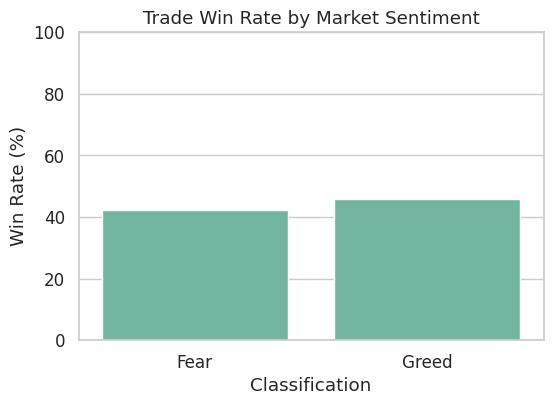

In [63]:
win_rate = (
    merged_df.groupby("Classification")["closedPnL"]
    .apply(lambda x: (x > 0).mean() * 100)
    .reset_index(name="Win Rate (%)")
)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=win_rate,
    x="Classification",
    y="Win Rate (%)"
)
plt.title("Trade Win Rate by Market Sentiment")
plt.ylim(0, 100)
plt.show()


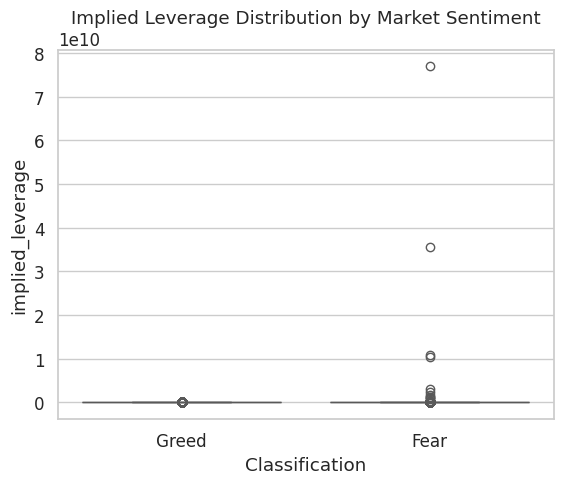

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=merged_df,
    x="Classification",
    y="implied_leverage"
)
plt.title("Implied Leverage Distribution by Market Sentiment")
plt.show()


Trader Behavior vs Sentiment

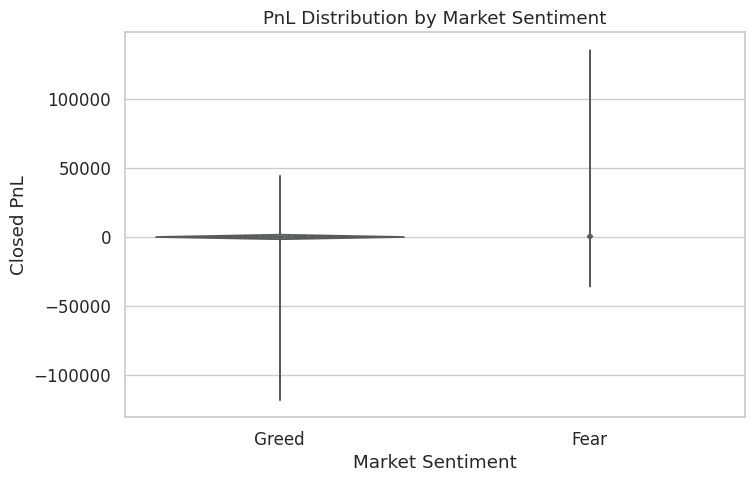

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.violinplot(
    data=merged_df,
    x="Classification",
    y="closedPnL",
    inner="quartile"
)
plt.title("PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


Time-Based Behavior (Rolling PnL vs Sentiment)

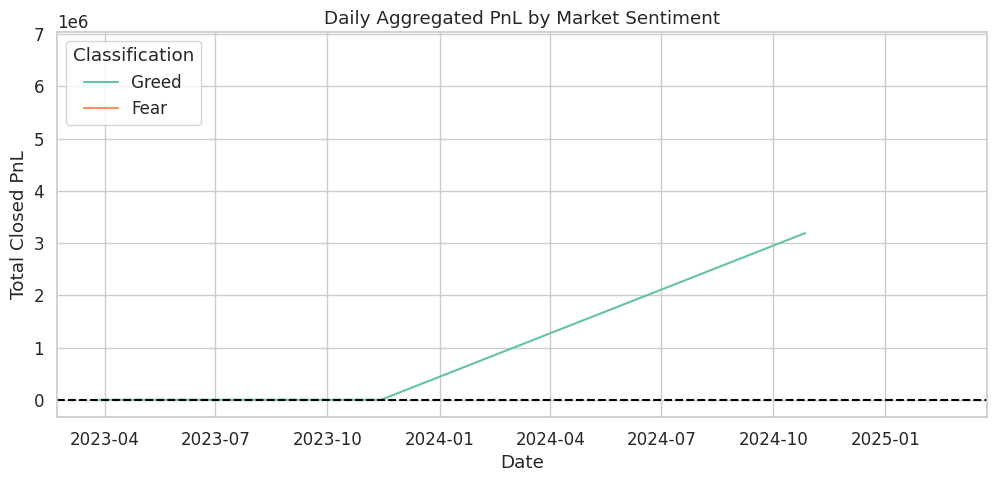

In [64]:
daily_pnl = (
    merged_df.groupby(["Date", "Classification"])["closedPnL"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 5))
sns.lineplot(
    data=daily_pnl,
    x="Date",
    y="closedPnL",
    hue="Classification"
)
plt.axhline(0, color="black", linestyle="--")
plt.title("Daily Aggregated PnL by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Total Closed PnL")
plt.show()
